
Creating a dataset of patient symptom data, including symptoms, frequency, severity, duration, co-occurrence, and diagnosed health conditions. The dataset is saved to a CSV file named "symptom_dataset.csv".



In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

num_symptoms = 10
symptom_columns = [f"Symptom_{i}" for i in range(1, num_symptoms + 1)]

health_conditions = ["Influenza", "Common Cold", "Pneumonia", "Bronchitis", "Asthma"]

data = []
for _ in range(100):
    symptoms = np.random.randint(0, 2, size=num_symptoms)
    frequency = np.random.randint(1, 6)
    severity = np.random.randint(1, 6)
    duration = np.random.randint(1, 11)
    co_occurrence = np.random.randint(0, 2, size=num_symptoms)
    health_condition = np.random.choice(health_conditions)

    patient_data = {
        **{col: sym for col, sym in zip(symptom_columns, symptoms)},
        'Frequency': frequency,
        'Severity': severity,
        'Duration': duration,
        **{f"Co-occurrence_{i}": co for i, co in enumerate(co_occurrence)},
        'Diagnosed_Health_Condition': health_condition
    }
    data.append(patient_data)

df=pd.DataFrame(data)

columns_order=['Diagnosed_Health_Condition', 'Frequency', 'Severity', 'Duration'] + symptom_columns + \
                [f"Co-occurrence_{i}" for i in range(num_symptoms)]
df = df[columns_order]

df.to_csv('symptom_dataset.csv', index=False)


Training a machine learning model to predict diagnosed health conditions based on patient symptom data and prints a classification report to evaluate its performance.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('symptom_dataset.csv')

X = df.drop('Diagnosed_Health_Condition', axis=1)
y = df['Diagnosed_Health_Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Asthma       0.33      0.50      0.40         4
  Bronchitis       0.00      0.00      0.00         5
 Common Cold       0.00      0.00      0.00         2
   Influenza       0.00      0.00      0.00         8
   Pneumonia       0.17      1.00      0.29         1

    accuracy                           0.15        20
   macro avg       0.10      0.30      0.14        20
weighted avg       0.07      0.15      0.09        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating a dataset of patient symptom descriptions along with their diagnosed health conditions and sentiments. The dataset is saved to a CSV file named "symptom_description_dataset.csv".

In [3]:
import pandas as pd
import numpy as np

np.random.seed(0)

symptom_descriptions = [
    "I have a headache and fever",
    "My throat feels sore and scratchy",
    "I'm coughing a lot and feeling short of breath",
    "I feel tired and achy all over",
    "I have a runny nose and watery eyes",
    "My stomach hurts and I feel nauseous",
    "I have a rash on my skin and it's itchy",
    "I'm experiencing chest pain and difficulty breathing",
    "I feel dizzy and lightheaded",
    "I have joint pain and swelling"
]

health_conditions = [
    "Headache, Fever",
    "Sore Throat",
    "Cough, Shortness of Breath",
    "Fatigue, Body Aches",
    "Runny Nose, Watery Eyes",
    "Stomach Pain, Nausea",
    "Skin Rash, Itchiness",
    "Chest Pain, Difficulty Breathing",
    "Dizziness, Lightheadedness",
    "Joint Pain, Swelling"
]

sentiments = ["Negative", "Neutral", "Negative", "Neutral", "Neutral",
              "Negative", "Negative", "Negative", "Negative", "Neutral"]

data = []
for _ in range(100):
    symptom_description = np.random.choice(symptom_descriptions)
    health_condition = np.random.choice(health_conditions)
    sentiment = np.random.choice(sentiments)

    data_entry = {
        'Text_Description_of_Symptoms': symptom_description,
        'Diagnosed_Health_Condition': health_condition,
        'Sentiment': sentiment
    }
    data.append(data_entry)

df = pd.DataFrame(data)

df.to_csv('symptom_description_dataset.csv', index=False)


In [4]:
import nltk


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Preprocessing symptom descriptions, analyzing sentiment, training a classifier to predict health conditions, and evaluating its performance.

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


df = pd.read_csv('symptom_description_dataset.csv')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):

    tokens = nltk.word_tokenize(text.lower())

    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)


df['Processed_Description'] = df['Text_Description_of_Symptoms'].apply(preprocess_text)

def analyze_sentiment(text):

    if 'pain' in text or 'hurt' in text or 'ache' in text:
        return 'Negative'
    else:
        return 'Neutral'


df['Sentiment_Analysis'] = df['Text_Description_of_Symptoms'].apply(analyze_sentiment)


X_train, X_test, y_train, y_test = train_test_split(df['Processed_Description'], df['Diagnosed_Health_Condition'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                                  precision    recall  f1-score   support

Chest Pain, Difficulty Breathing       0.00      0.00      0.00         1
      Cough, Shortness of Breath       0.00      0.00      0.00         2
      Dizziness, Lightheadedness       1.00      0.67      0.80         3
             Fatigue, Body Aches       0.00      0.00      0.00         2
                 Headache, Fever       0.50      0.33      0.40         3
            Joint Pain, Swelling       0.20      0.25      0.22         4
         Runny Nose, Watery Eyes       0.00      0.00      0.00         1
            Skin Rash, Itchiness       0.00      0.00      0.00         1
                     Sore Throat       0.00      0.00      0.00         2
            Stomach Pain, Nausea       0.00      0.00      0.00         1

                        accuracy                           0.20        20
                       macro avg       0.17      0.12      0.14        20
             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performing K-means clustering on symptom descriptions using TF-IDF vectorization and PCA for dimensionality reduction. Futhermore, visualizing the clustering results in a 2D scatter plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


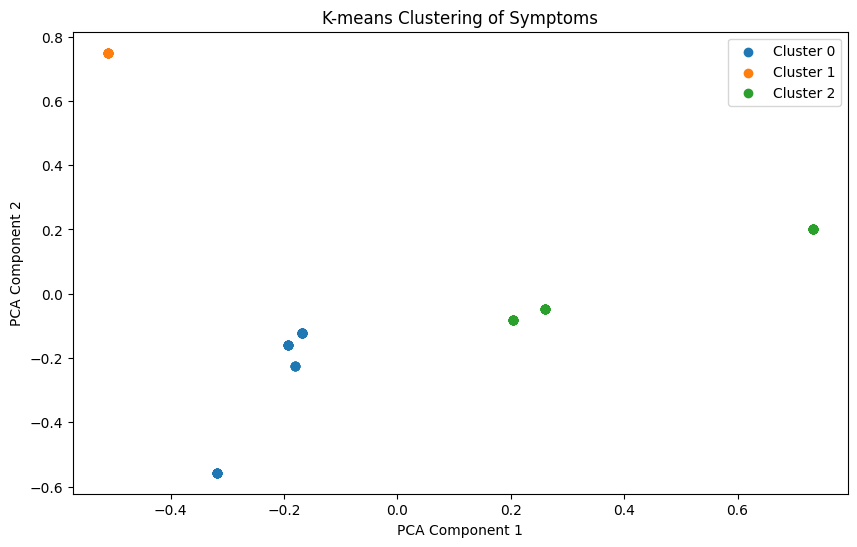

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv('symptom_description_dataset.csv')


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text_Description_of_Symptoms'])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

df['PCA Component 1'] = X_pca[:, 0]
df['PCA Component 2'] = X_pca[:, 1]


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)


df['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
for cluster in sorted(df['Cluster'].unique()):
    plt.scatter(df.loc[df['Cluster'] == cluster, 'PCA Component 1'],
                df.loc[df['Cluster'] == cluster, 'PCA Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Symptoms')
plt.legend()
plt.show()


 Generating synthetic data for user-provider interactions in a healthcare system and saving it to a CSV file named "interaction_dataset".

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(0)


user_ids = ['User_' + str(i).zfill(3) for i in range(1, 11)]


provider_ids = ['Provider_' + str(i).zfill(3) for i in range(1, 11)]


interaction_types = ['Appointment', 'Consultation', 'Follow-up']


specialties = ['Cardiology', 'Pediatrics', 'Orthopedics', 'Dermatology', 'Ophthalmology',
               'Gynecology', 'Neurology', 'ENT', 'Dentistry', 'Psychiatry']

locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
             'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']


data = []
for _ in range(100):
    user_id = np.random.choice(user_ids)
    provider_id = np.random.choice(provider_ids)
    interaction_type = np.random.choice(interaction_types)
    timestamp = datetime(2023, 5, 1) + timedelta(days=np.random.randint(0, 30), hours=np.random.randint(0, 24))
    specialty = np.random.choice(specialties)
    location = np.random.choice(locations)
    ratings = round(np.random.uniform(3.0, 5.0), 1)
    years_of_experience = np.random.randint(1, 30)


    interaction_entry = {
        'User ID': user_id,
        'Provider ID': provider_id,
        'Interaction Type': interaction_type,
        'Timestamp': timestamp,
        'Specialty': specialty,
        'Location': location,
        'Ratings': ratings,
        'Years of Experience': years_of_experience
    }
    data.append(interaction_entry)


df = pd.DataFrame(data)


df.to_csv('interaction_dataset.csv', index=False)


Recommending healthcare providers to users based on their preferences using collaborative filtering. And preprocessing the dataset, calculating similarity between user preferences and provider attributes, and generating top recommendations for a specific user.

In [8]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

df = pd.read_csv('interaction_dataset.csv')
df.fillna(0, inplace=True)

label_encoder_specialty = LabelEncoder()
label_encoder_location = LabelEncoder()

label_encoder_specialty.fit(df['Specialty'])
label_encoder_location.fit(df['Location'])

df['Specialty'] = label_encoder_specialty.transform(df['Specialty'])
df['Location'] = label_encoder_location.transform(df['Location'])

scaler = StandardScaler()
df['Ratings'] = scaler.fit_transform(df['Ratings'].values.reshape(-1, 1))

X = df[['Specialty', 'Location', 'Ratings']]
y = df['Provider ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calculate_similarity(user_preferences, provider_attributes):
    similarity_scores = cosine_similarity([user_preferences], provider_attributes)
    return similarity_scores[0]

def generate_recommendations(user_preferences, provider_attributes, top_n=5):
    similarity_scores = calculate_similarity(user_preferences, provider_attributes)
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    recommendations = df.iloc[top_indices]
    return recommendations

user_preferences = {
    'Specialty': label_encoder_specialty.transform(['Cardiology'])[0],
    'Location': label_encoder_location.transform(['New York'])[0],
    'Ratings': scaler.transform([[4.5]])[0][0]
}

user_preferences_array = np.array([user_preferences['Specialty'], user_preferences['Location'], user_preferences['Ratings']])

provider_attributes = X_train.values

recommendations = generate_recommendations(user_preferences_array, provider_attributes)

print("Recommendations for the user:")
print(recommendations)


Recommendations for the user:
     User ID   Provider ID Interaction Type            Timestamp  Specialty  \
21  User_009  Provider_009        Follow-up  2023-05-16 03:00:00          5   
15  User_004  Provider_009      Appointment  2023-05-09 13:00:00          1   
6   User_009  Provider_005     Consultation  2023-05-16 04:00:00          9   
44  User_008  Provider_010     Consultation  2023-05-10 22:00:00          0   
53  User_004  Provider_003      Appointment  2023-05-20 14:00:00          0   

    Location   Ratings  Years of Experience  
21         2  1.452475                    6  
15         0 -0.787403                    3  
6          1  1.452475                    8  
44         2 -1.132000                   18  
53         2 -1.132000                   13  


Inversely transforming the scaled ratings of recommended healthcare providers back to their original values and displaying the recommendations for the user.

In [9]:
recommendations['Ratings'] = scaler.inverse_transform(recommendations['Ratings'].values.reshape(-1, 1))
print("Recommendations for the user:")
print(recommendations)


Recommendations for the user:
     User ID   Provider ID Interaction Type            Timestamp  Specialty  \
21  User_009  Provider_009        Follow-up  2023-05-16 03:00:00          5   
15  User_004  Provider_009      Appointment  2023-05-09 13:00:00          1   
6   User_009  Provider_005     Consultation  2023-05-16 04:00:00          9   
44  User_008  Provider_010     Consultation  2023-05-10 22:00:00          0   
53  User_004  Provider_003      Appointment  2023-05-20 14:00:00          0   

    Location  Ratings  Years of Experience  
21         2      4.8                    6  
15         0      3.5                    3  
6          1      4.8                    8  
44         2      3.3                   18  
53         2      3.3                   13  


<ipython-input-9-5c2c166a44f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['Ratings'] = scaler.inverse_transform(recommendations['Ratings'].values.reshape(-1, 1))
